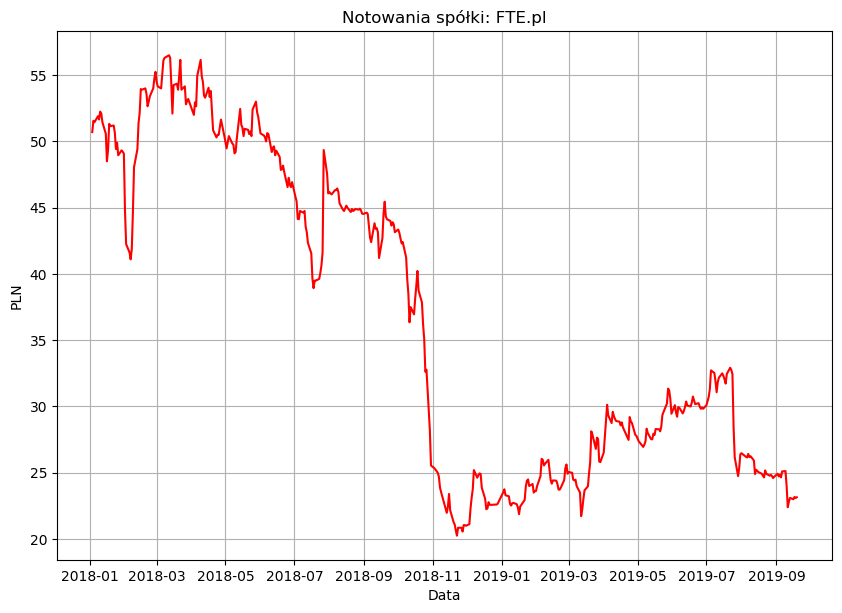

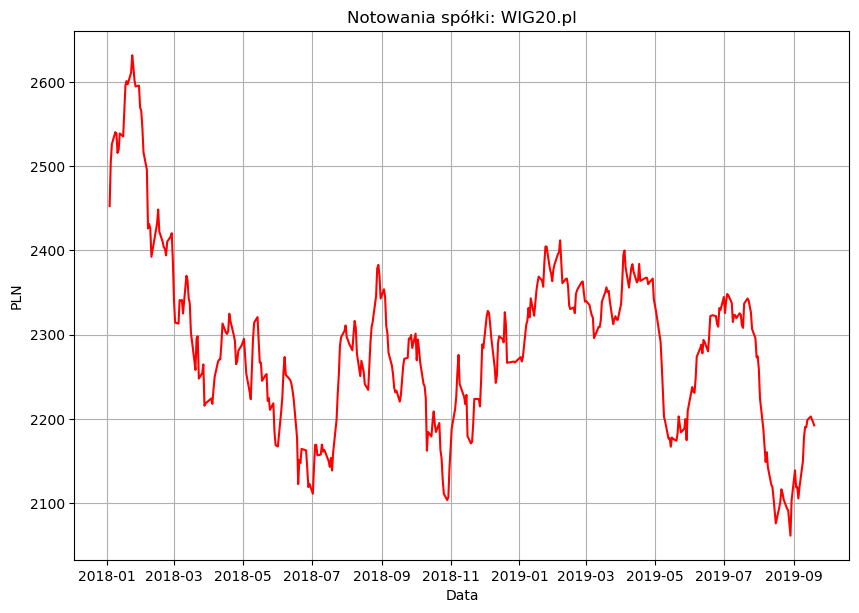

In [2]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()
import os
import smtplib
import imghdr
from email.message import EmailMessage

# time_from = datetime.now()
# print(time_from)

def modify_source(df):
    df['Date'] = df.index
    df = df.reset_index(drop=True)
    cols = list(df.columns)
    df = df[[cols[-1]] + cols[0:5]]

def mean_seirie():
    df['Mean'] = (df['High'] + df['Low']) / 2

    
for symbol in ['FTE.pl', 'WIG20.pl']:
#     symbol = input("Wprowadż symbol akcji lub indeksu: ") 
    df = web.DataReader(symbol, 'stooq')
    modify_source(df)
    mean_seirie()
    # date_from = input('Pokaż notowania od (RRRR-MM-DD): ')
    data_from = df.loc[df['Date'] >= '2018-01-01']
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid')
    plt.title("Notowania spółki: {}".format(symbol))
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
#     plt.savefig('charts/{}.png'.format(symbol))
    plt.show()

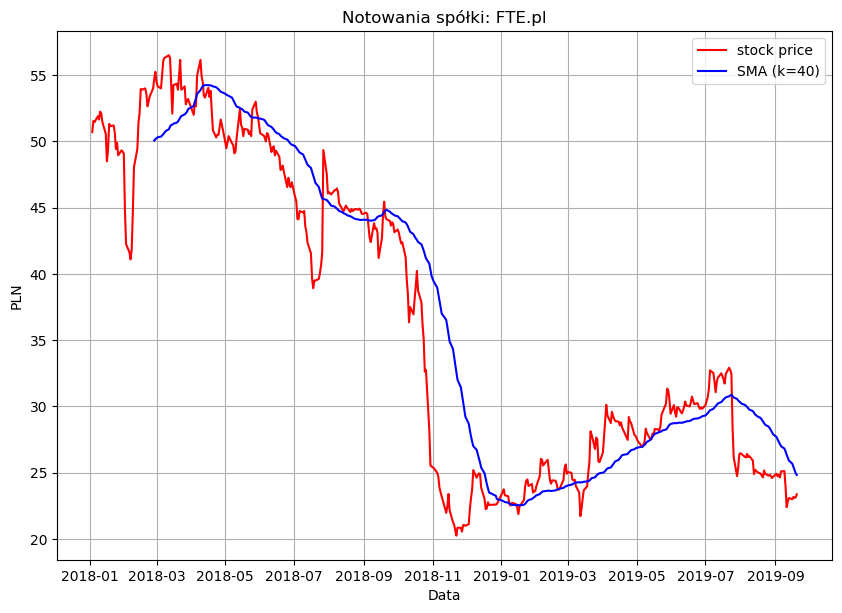

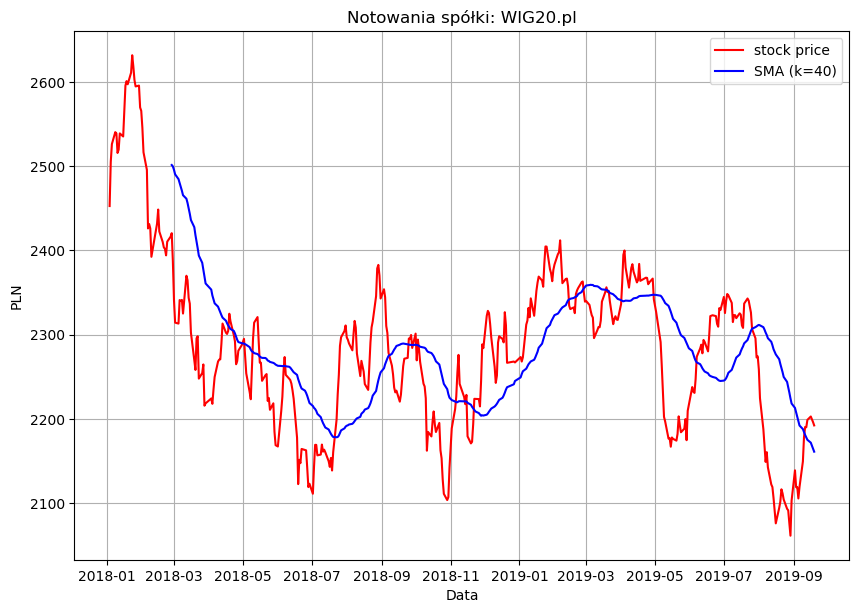

In [274]:
for symbol in ['FTE.pl', 'WIG20.pl']:
#     symbol = input("Wprowadż symbol akcji lub indeksu: ") 
    df = web.DataReader(symbol, 'stooq')
    modify_source(df)
    mean_seirie()
    # date_from = input('Pokaż notowania od (RRRR-MM-DD): ')
    data_from = df.loc[df['Date'] >= '2018-01-01']
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    k = 40
    SMA = list(data_from['Mean'].rolling(window=k).mean().shift(1-k))
    
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid', label='stock price')
    plt.plot(x, SMA, color='b', marker='', linestyle='solid', label='SMA (k={})'.format(k))
    plt.title("Notowania spółki: {}".format(symbol))
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
#     plt.savefig('charts/{}.png'.format(symbol))
    plt.legend()
    plt.show()

In [269]:

a = ['2018-01-12','2018-01-11','2018-01-10','2018-01-09','2018-01-08','2018-01-07','2018-01-06','2018-01-05','2018-01-04','2018-01-03','2018-01-02','2018-01-01']
price = [1, 2, 0.5, 0.8, 1.5, 3, 3.5, 4, 4, 4, 4.5, 5]
SMA = [2, 1, 1, 1, 1, 4, 4, 5, 3.5, 3, 3, 3]


In [270]:
import pandas as pd
df = pd.DataFrame(list(zip(a, price, SMA)), columns=['Data', 'Price', "SMA"])
df['Data'] = pd.to_datetime(df['Data'])
df

,Data,Price,SMA
0,2018-01-12,1.0,2.0
1,2018-01-11,2.0,1.0
2,2018-01-10,0.5,1.0
3,2018-01-09,0.8,1.0
4,2018-01-08,1.5,1.0
5,2018-01-07,3.0,4.0
6,2018-01-06,3.5,4.0
7,2018-01-05,4.0,5.0
8,2018-01-04,4.0,3.5
9,2018-01-03,4.0,3.0


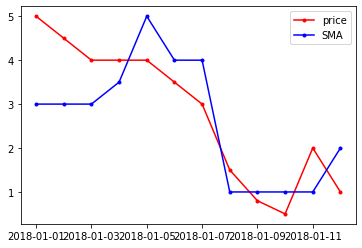

In [271]:
import matplotlib.pyplot as plt
x = list(df['Data'])

# print(df['Data'].dtype)
y = list(df['Price'])
z = list(df['SMA'])
plt.plot(x, y, marker='.', color='red', label='price')
plt.plot(x, z, marker='.', color='blue', label='SMA')
plt.legend()

In [272]:
df = df[::-1]
df = df.reset_index()
del df['index']
df

,Data,Price,SMA
0,2018-01-01,5.0,3.0
1,2018-01-02,4.5,3.0
2,2018-01-03,4.0,3.0
3,2018-01-04,4.0,3.5
4,2018-01-05,4.0,5.0
5,2018-01-06,3.5,4.0
6,2018-01-07,3.0,4.0
7,2018-01-08,1.5,1.0
8,2018-01-09,0.8,1.0
9,2018-01-10,0.5,1.0


In [273]:
buy = []
sell = []
for i in range(1, len(df)):
    print(df.loc[i, 'SMA'], df.loc[i, 'Price'])
    if (df.loc[i, 'SMA'] < df.loc[i,'Price']) & (df.loc[i-1, 'SMA'] >= df.loc[i-1,'Price']):
        buy.append(df.loc[i, 'Price'])
    elif len(buy) != 0:
        if (df.loc[i, 'SMA'] > df.loc[i,'Price']) & (df.loc[i-1, 'SMA'] <= df.loc[i-1,'Price']):
            sell.append(df.loc[i,'Price'])
        else:
            pass
    else: 
        pass
print(buy)
print(sell)

outcome = [j - i for i, j in zip(buy, sell)]
profit = sum(outcome)
print(profit)

    


3.0 4.5
3.0 4.0
3.5 4.0
5.0 4.0
4.0 3.5
4.0 3.0
1.0 1.5
1.0 0.8
1.0 0.5
1.0 2.0
2.0 1.0
[1.5, 2.0]
[0.8, 1.0]
-1.7
